# Project Title: Bank Loan Default Prediction

#### Problem Statement: 

Bank Loan Defaults affects revenue for banks and will create additional expenses at its worst. By using a relevant data set, we will create a machine learning model to predict if customer will default on bank loan which will help banks to plan policies as well as take actions to prevent defaults.

------

## Exploratory Data Analysis

In [1]:
# import libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for machine learning modelling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#import libraries for model evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
# import .csv file 
# taken from https://www.kaggle.com/datasets/kmldas/loan-default-prediction

df = pd.read_csv('Default_Fin.csv')

In [3]:
# preview data

df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df.shape

(10000, 5)

In [5]:
# making 'Index' column as index

df = df.set_index('Index')

df

,Employed,Bank Balance,Annual Salary,Defaulted
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0
...,...,...,...,...
9996,1,8538.72,635908.56,0
9997,1,9095.52,235928.64,0
9998,1,10144.92,703633.92,0


In [6]:
# check for duplicates, df.drop_duplicates if need

df.duplicated().sum()

0

No duplicates found

In [7]:
# check for null/invalid data
# fill null/invalid with mean/median values using .fillna as required

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 390.6 KB


Employed         0
Bank Balance     0
Annual Salary    0
Defaulted        0
dtype: int64

No null/invalid data found

In [8]:
# data summary

df.describe()

,Employed,Bank Balance,Annual Salary,Defaulted
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


Data seems clean and valid as of now without noticable outliers
(i.e. only integers for min/max values in employed & defaulted, no neg values for salary and bank balance)

### Visualizations

In [9]:
# check correlation of data

df.corr()

,Employed,Bank Balance,Annual Salary,Defaulted
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted,-0.035420,0.350119,-0.019871,1.000000


array([[<AxesSubplot:title={'center':'Employed'}>,
        <AxesSubplot:title={'center':'Bank Balance'}>],
       [<AxesSubplot:title={'center':'Annual Salary'}>,
        <AxesSubplot:title={'center':'Defaulted'}>]], dtype=object)

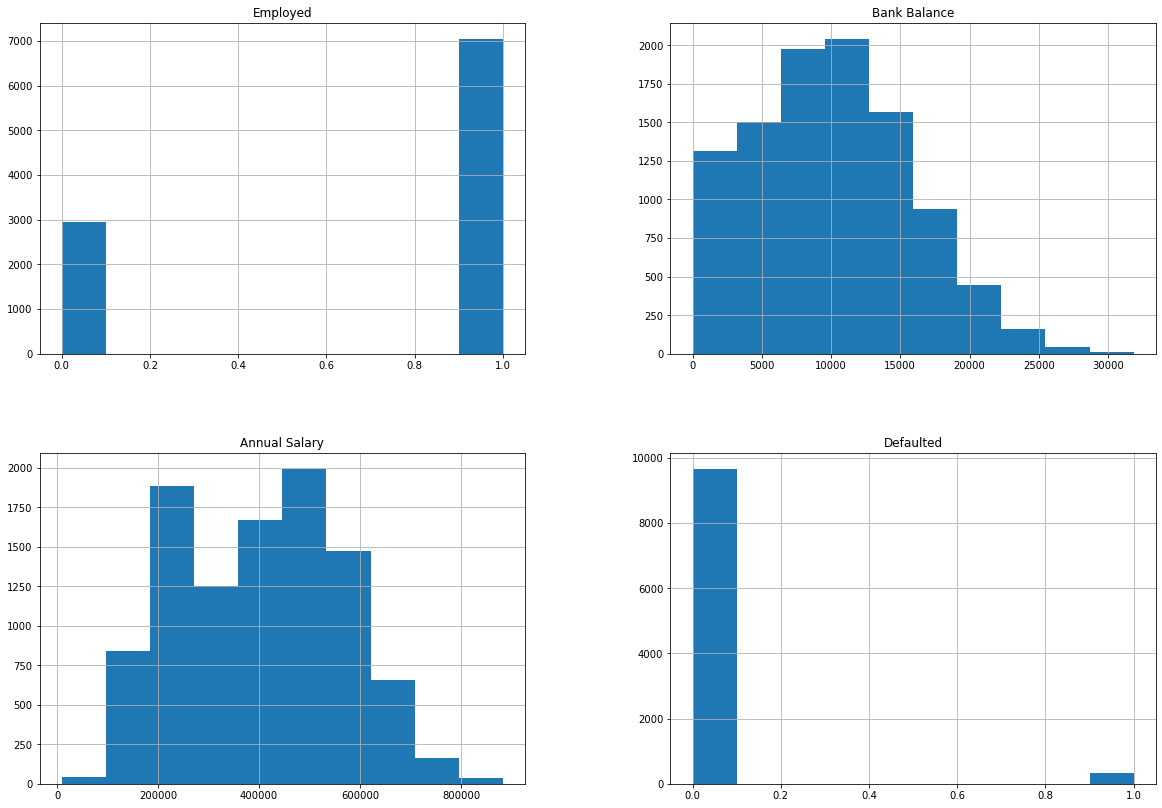

In [10]:
# plot histogram

df.hist(figsize=(20, 14))

<AxesSubplot:>

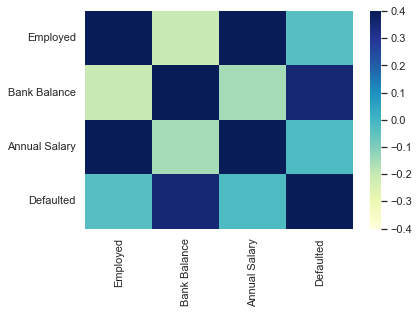

In [11]:
# heatmap
# correlation is small hence set min and max for heatmap at -0.4 and 0.4 respectively

sns.set(font_scale=1)
sns.heatmap(df.corr(), cmap="YlGnBu",
            vmin=-0.4, vmax=0.4)

First look at correlation table, histogram and heatmap plotted (with main focus on loan default):

1. The number of defaulted cases is small, which may be insufficient to create a machine learning model for low bias and low variance
2. The only correlation that is significant is between defaulted and bank balance (approx. 0.350, compared to -0.019 and - 0.035) - but due to the dataset being simplistic with lack of variables we will not remove any of these datas in our models later.

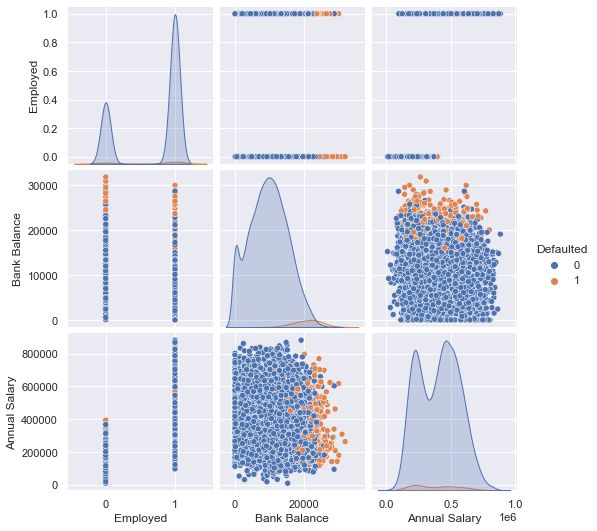

In [12]:
# pair plot

sns.pairplot(df, 
             hue="Defaulted"
            )

From the pair plot, we can observe that the general trend of defaults lies mainly with the amount of bank balance (above 20k), just like the correlation we've derived earlier.

Using these data analysis, we can start to create a machine learning model to predict defaults.

### Machine Learning Modelling - K-Nearest Neighbour (KNN)

In [13]:
# re-read .csv file

data = pd.read_csv('Default_Fin.csv')

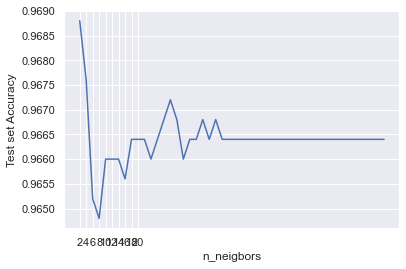

In [14]:
# KNN modelling

y_knn = data.Defaulted
X_knn = data.drop('Defaulted',axis=1)

X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, random_state=23)

acc = []

for i in range(2, 50, 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    _ = knn.fit(X_knn_train, y_knn_train)
    y_pred_knn = knn.predict(X_knn_test)
    acc.append(accuracy_score(y_knn_test, y_pred_knn))

    
_ = plt.plot(acc)
_ = plt.xticks(ticks=range(10), labels=range(2, 21, 2))
_ = plt.xlabel('n_neigbors')
_ = plt.ylabel('Test set Accuracy')

In [15]:
# run KNN model with optimised n_neighbour=16

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_knn_train, y_knn_train)

y_pred_knn = knn.predict(X_knn_test)

print(accuracy_score(y_knn_test, y_pred_knn))

0.9672


The KNN Model has a high accuracy score of 0.97

### KNN Model Evaluation

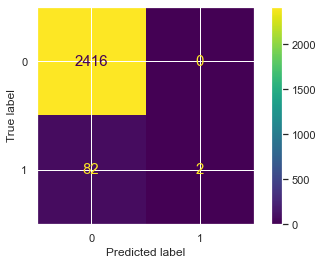

In [16]:
# KNN Model Confusion Matrix

font = {'family' : 'Arial', 'size'   : 15}
plt.rc('font', **font)

cm_knn = confusion_matrix(y_knn_test, y_pred_knn)

cm_knn_display = ConfusionMatrixDisplay(cm_knn).plot()

AUC score:  0.8461521404919584


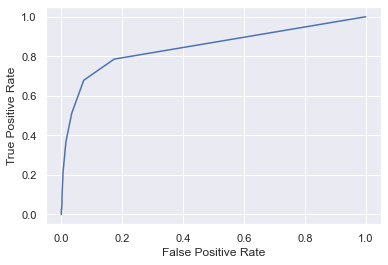

In [17]:
# KNN Model ROC Curve

y_knn_score = knn.predict_proba(X_knn_test)[:,1]

fpr, tpr, _ = roc_curve(y_knn_test, y_knn_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ', roc_auc_score(y_knn_test, knn.predict_proba(X_knn_test)[:, 1])) 

Since Area Under Curve (AUC) Score is 0.84 (Random = 0.5, Ideal = 1.0), it is a relatively good model where ressults are false positive is low. 

### Machine Learning Modelling - Decision Tree (DT)

In [18]:
# DT modelling

y_dt = data.Defaulted
X_dt = data.drop('Defaulted', axis=1)

X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, random_state=23, test_size=0.2)

dt = DecisionTreeClassifier()
dt.fit(X_dt_train, y_dt_train)

y_preds_dt = dt.predict(X_dt_test)

accuracy_score(y_dt_test, y_preds_dt)

0.9525

The DT Model has a high accuracy score of 0.953

### DT Model Evaluation

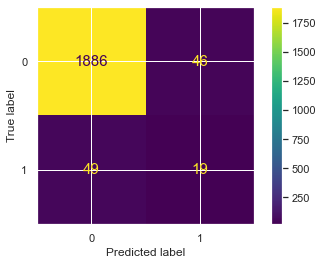

In [19]:
# Confusion Matrix

font = {'family' : 'Arial', 'size'   : 15}
plt.rc('font', **font)

cm = confusion_matrix(y_dt_test, y_preds_dt)

cm_display = ConfusionMatrixDisplay(cm).plot()

AUC score:  0.6278011204481792


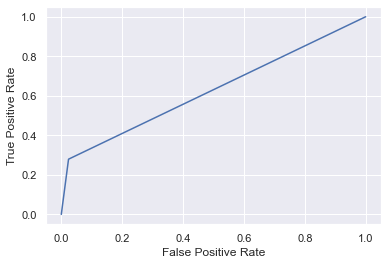

In [20]:
# DT Model ROC Curve

y_dt_score = dt.predict_proba(X_dt_test)[:,1]

fpr, tpr, _ = roc_curve(y_dt_test, y_dt_score, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_dt_test, dt.predict_proba(X_dt_test)[:, 1])) 

Since Area Under Curve (AUC) Score is 0.65 (Random = 0.5, Ideal = 1.0), the model is still lacking in terms of reducing false positives

### Machine Learning Modelling - Logistic Regression (LR)

In [21]:
# convert to standard normal distribution

dataLR = (data - data.mean()) / data.std()

# build LR Model

LR = LogisticRegression()
X = dataLR.drop('Defaulted', axis=1)
y = (dataLR.Defaulted > 0).apply(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9724


The LR Model has a high accuracy score of 0.97

### LR Model Evaluation

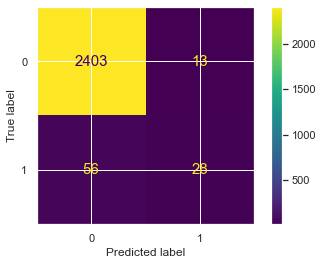

In [22]:
# LR Model Confusion Matrix

font = {'family' : 'Arial', 'size'   : 15}
plt.rc('font', **font)

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

AUC score:  0.9460294465468306


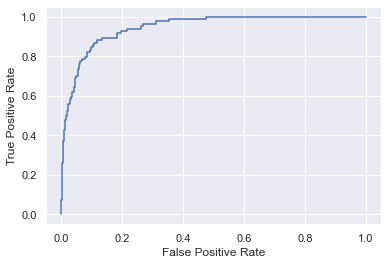

In [23]:
# LR Model ROC Curve

y_score = LR.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=LR.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])) 

Since Area Under Curve (AUC) Score is 0.946 (Random = 0.5, Ideal = 1.0), it is a relatively good model where ressults are false positive is low. 

### Conclusion

- From the 3 models, we can rank the models using the prediction accuracy scores and ROC AUC scores
        1. Logistics Regressions (pred 0.972, AUC 0.946)
        2. K-Nearest Neighbour (pred 0.967, AUC 0.842)
        3. Decision Tree (pred 0.953, AUC 0.663)
- Decision Tree is not a recommended model with the AUC close to 0.5, meaning there is high chances the prediction can be false postive or false negative.

- The current models are fairly basic as well as limited due to the following:
        1. Dataset has minimal features to work with
        2. 2 out of the 3 features in the dataset has low correlation
        3. Dataset may not be a good representation of the entire population of customers
        4. With the above points, we can presume that predictions may be skewed and biased; we can resolve this by expanding the data input features
        
- All models can be further optimized with GridSearchCV

In [1]:
# End of project